In [1]:
from datasets import get_dataset_config_names
import matplotlib.pyplot as plt

In [2]:
domains = get_dataset_config_names("subjqa")
domains

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [3]:
from datasets import load_dataset

subjqa = load_dataset("subjqa", name="electronics")

Reusing dataset subjqa (/home/abdelrahman/.cache/huggingface/datasets/subjqa/electronics/1.1.0/e5588f9298ff2d70686a00cc377e4bdccf4e32287459e3c6baf2dc5ab57fe7fd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
print(subjqa['train']['question'][1])
print("="*50)
print(subjqa["train"]["answers"][1])

Is this music song have a goo bass?
{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [5]:
type(subjqa)

datasets.dataset_dict.DatasetDict

In [6]:
import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}

for split, df in dfs.items():
    print(f"Number of questions in {split}: {df['id'].nunique()}")

Number of questions in train: 1295
Number of questions in test: 358
Number of questions in validation: 255


In [7]:
type(dfs)

dict

In [9]:
qa_cols = ["title", "question", "answers.text",
           "answers.answer_start", "context"]
sample_df = dfs["train"][qa_cols].sample(20, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...
961,B0074BW614,How is the cell phone screen?,[The interface takes a few tries to get used t...,[535],"Don't get me wrong, I love my e-ink kindle to ..."
1188,B00BGGDVOO,Do you have any computer with mouse?,[],[],After deciding to ditch cable TV I started to ...
999,B007P4VOWC,How is the camera?,[],[],I purchased the Tab 2 for my fianc&eacute; and...
1133,B009H0XQPA,What is the active display?,[Thrilled with this purchase! I],[0],Thrilled with this purchase! I bought it for ...
733,B004ZGN6MY,Is a good tripod?,"[This tripod is nice and cheap, This tripod is...","[48, 48]",The price to quality is what you would expect....
305,B0027VT6V4,How do you hear the bass?,[],[],I have been using these speakers for about a w...
34,B00007E7JU,Are the images of very good quality?,[],[],"When I bought this lens, it rarely came off my..."
905,B006ZS5ATM,What do you think about headphone?,[],[],I had a smaller headset that went on the ear. ...


In [10]:
dfs["train"]['context'][791]

"I really like this keyboard.  I give it 4 stars because it doesn't have a CAPS LOCK key so I never know if my caps are on.  But for the price, it really suffices as a wireless keyboard.  I have very large hands and this keyboard is compact, but I have no complaints."

In [11]:
dfs["train"]['context']

0       I have had Koss headphones in the past, Pro 4A...
1       To anyone who hasn't tried all the various typ...
2       I have had many sub-$100 headphones from $5 Pa...
3       My sister's Bose headphones finally died and s...
4       Wow. Just wow. I'm a 22 yr old with a crazy ob...
                              ...                        
1290    I ordered my new NewTrend Airbender Pro NT610K...
1291    I ordered my new NewTrend Airbender Pro NT610K...
1292    After using this case for a few days, I have g...
1293    Edit 4/21/14. I finally caved and purchased a ...
1294    The Belkin QODE Portable Bluetooth Keyboard Ca...
Name: context, Length: 1295, dtype: object

In [12]:
dfs["train"]['answers.text']

0                                                      []
1       [Bass is weak as expected, Bass is weak as exp...
2               [The only fault in the sound is the bass]
3                               [the best of all of them]
4       [The sound is so crisp, crazy obsession with s...
                              ...                        
1290                                                   []
1291                                                   []
1292                                                   []
1293    [the keyboard is very easy to use, the keyboar...
1294                     [is easy to use and works great]
Name: answers.text, Length: 1295, dtype: object

In [13]:
type(dfs["train"]['answers.text'][1])

numpy.ndarray

In [14]:
dfs["train"]['answers.text'][1].shape

(2,)

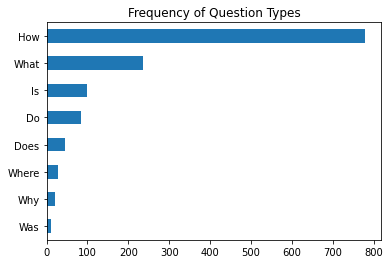

In [15]:
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
    counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [16]:
for question_type in ["How", "What", "Is"]:
    for question in (
        dfs["train"][dfs["train"].question.str.startswith(question_type)]
        .sample(n=3, random_state=42)['question']):
        print(question)

How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


In [17]:
from transformers import AutoTokenizer

In [18]:
model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [21]:
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on \
file size."""
inputs = tokenizer(question, context, return_tensors="pt")

In [22]:
inputs

{'input_ids': tensor([[  101,  2129,  2172,  2189,  2064,  2023,  2907,  1029,   102,  2019,
         23378,  2003,  2055,  1015, 16914,  1013,  3371,  1010,  2061,  2055,
         25961,  2847,  5834,  2006,  5371,  2946,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [23]:
print(tokenizer.decode(inputs["input_ids"][0]))


[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]


In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering

In [ ]:

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

In [ ]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits

In [ ]:
print(f"Input IDs shape: {inputs.input_ids.size()}")
print(f"Start logits shape: {start_logits.size()}")
print(f"End logits shape: {end_logits.size()}")

In [ ]:
import torch

start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits) + 1
answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)
print(f"Question: {question}")
print(f"Answer: {answer}")

In [ ]:
from transformers import pipeline


In [ ]:
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question=question, context=context, topk=3)


In [ ]:
pipe(question="Why is there no data?", context=context,
     handle_impossible_answer=True)